<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018


En este notebook se aborda el tema de aprendizaje de máquina para clasificación binaria no-lineal utilizando Regresores logísticos en cadena:
1. El problema XOR
2. Regresores logísticos en cadena

<hr>
# 1. El problema XOR

<img src='res/shallow_nn/xor_problem.png'>

 # 1. Regresor Logístico

In [1]:
import numpy as np

In [2]:
def linear_activation(W, b, a):
    z = np.dot(W,a) + b
    
    return z

In [3]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [4]:
def d_sigmoid(z):
    return sigmoid(z) * (1. - sigmoid(z))

In [5]:
def loss(y, a):
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [6]:
def cost(logloss):
    return np.mean(logloss)

In [7]:
def predict_multilayer(parameters,X):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = linear_activation(W1,b1,X)
    A1 = sigmoid(Z1)
    
    Z2 = linear_activation(W2,b2,A1)
    A2 = sigmoid(Z2)

    return np.round(A2)

<hr>
# Trabajemos
3. Realicemos descenso del gradiente sobre la red neural completa.

### - Dataset XOR

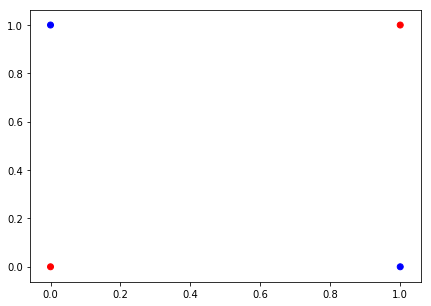

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0, 1, 1, 0]])

nx, m = X.T.shape
color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

X = X.T

### - Inicializacion de parametros de la red.

In [10]:
def initialize_parameters(neurons_hidden_layer=2):

    W1 = np.random.randn(neurons_hidden_layer, 2)
    b1 = np.zeros([neurons_hidden_layer, 1])

    W2 = np.random.randn(1, neurons_hidden_layer)
    b2 = np.zeros([1,1])
    
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}
    
    return parameters

In [12]:
apellidos = {"pedro":"atencio", "julio":"torres"}

print apellidos["julio"]

torres


<hr>
### - Apliquemos descenso del gradiente a cada regresor logístico por separado

('parametros iniciales: ', {'b2': array([[ 0.]]), 'b1': array([[ 0.],
       [ 0.]]), 'W1': array([[ 1.15057785,  0.23280167],
       [ 0.39616253,  0.66025473]]), 'W2': array([[ 0.50979095, -1.95218677]])})
('costo -- iteracion ', 0, ': ', 0.79274483768538639)
('costo -- iteracion ', 1000, ': ', 0.044939268830430437)
('costo -- iteracion ', 2000, ': ', 0.013990093474148306)
('costo -- iteracion ', 3000, ': ', 0.0081297374630305754)
('costo -- iteracion ', 4000, ': ', 0.0057026411971989877)
('costo -- iteracion ', 5000, ': ', 0.0043828229453796181)
('costo -- iteracion ', 6000, ': ', 0.0035553646110527324)
('costo -- iteracion ', 7000, ': ', 0.0029888382675096301)
('costo -- iteracion ', 8000, ': ', 0.002576975482007862)
('costo -- iteracion ', 9000, ': ', 0.0022642225172859326)
('parametros actualizados: ', {'b2': array([[-6.36633514]]), 'b1': array([[-3.47164176],
       [-8.8775158 ]]), 'W1': array([[ 7.55125512,  7.55013608],
       [ 5.80599471,  5.80577403]]), 'W2': array([[ 13.5

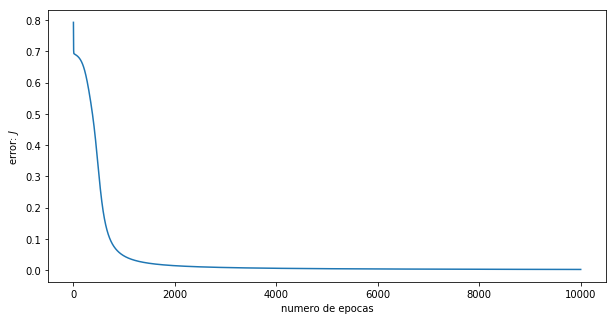

In [23]:
'''
Metaparameters initialization
'''
num_epochs = 10000
learning_rate = 0.5

'''
Parameters initialization
'''
parameters = initialize_parameters(neurons_hidden_layer=2)
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

print ("parametros iniciales: ", parameters)

error_array = np.zeros([num_epochs])#lo utilizaremos para plotear el error

'''
Gradient descent
'''
for i in range(num_epochs): #2000 iteraciones del descenso del gradiente
    '''
    Forward Propagation
    '''
    Z1 = linear_activation(W1, b1, X)
    A1 = sigmoid(Z1)

    Z2 = linear_activation(W2, b2, A1)
    A2 = sigmoid(Z2)

    '''
    Backward Propagation
    '''
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.multiply(np.dot(W2.T, dZ2), d_sigmoid(Z1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    '''
    Parameters Update
    '''
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2

    '''
    Cost estimation
    '''
    J = cost(loss(Y,A2))
    error_array[i] = J
    
    
    if(i%1000 == 0):
        print("costo -- iteracion ", i, ": ", J)
        
print("parametros actualizados: ", parameters)

'''
Testing
'''
print("Predicciones del clasificador: ", predict_multilayer(parameters,X))

'''
Visualizacion del error por epoca
'''
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,num_epochs-1, num_epochs), error_array)
plt.xlabel("numero de epocas")
plt.ylabel("error: "+r'$J$')
plt.show()

### - Visualizacion del resultado

In [24]:
import matplotlib.pyplot as plt

def visualize_lr(parameters, X, Y):
    X = X.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = predict_multilayer(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)
    
    plt.show()

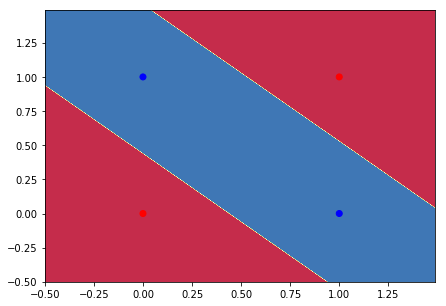

In [25]:
visualize_lr(parameters, X, Y)